## Q.1.

Implement Watts and Strogatz’s small-world network model. Compute and plot the ‘scaled clustering coefficient’ and ‘scaled characteristic path length’ of Watts and Strogatz network models with increasing value of rewiring probability. Choose the values of 𝑛, 𝑘 suitably. Exact replication of the below-shown plot is expected.

### Libraries Import

In [1]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Set the initial values
n = 1000    # n is the number of nodes in the graph
k = 10      # k is the degree of each node in the regular graph

In [3]:
"""
Function         : drawKRegular
Input Parameters : Number of nodes, n and value of the parameter, k(defined for k-Regular Graph)
Purpose          : To create a k-Regular Graph
Returns          : A k-Regular Graph
"""

def drawKRegular(n, k):
    node_list = [item for item in range(0, n)]             # Defines the nodes
    G = nx.Graph()                                         # Makes the graph with no nodes and edges
    G.add_nodes_from(node_list)                            # adds the nodes from the node_list defined above into the graph
    
    for i in range(n):                                     # for each node
        for j in range(1,int(k/2)+1):                      # for connecting each node to the j nearest neighbours(the edge is undirected, therefore k/2)
            G.add_edge(i, (i+j)%n)                         # adds the edge into the graph
    return G                                               # returns the k-Regular Graph

In [4]:
G = drawKRegular(n, k)                                     # Calls the drawKRegular function and returns the graph
L0 = nx.average_shortest_path_length(G)                    # L0 stores the characteristic path length of the k-Regular Graph
C0 = nx.average_clustering(G)                              # C0 stores the average clustering coefficient of the k-Regular graph
print("Characteristic Path length:", L0)
print("Clustering Coefficient:", C0)

Characteristic Path length: 50.450450450450454
Clustering Coefficient: 0.6666666666666636


In [5]:
"""
Function         : runSmallWorld
Input Parameters : Probability value(p), k-Regular Graph(G) and value of the parameter(k) (defined for k-Regular Graph)
Purpose          : This function creates the graphs i.e adds the randomness into the graph through the process of rewiring 
                   on the basis of probability from being a k-Regular Graph(at p = 0) to completely random graph(at p = 1)
                   and storing characteristic path length and clustering coefficient
Returns          : Characteristic Path length and Clustering coefficient
"""

def runSmallWorld(p, G, k):
    for j in range(1,int(k/2)+1):                           # For each edge (since it is undirected therefore k/2)
        node_list = list(G.nodes())                         # Fetch the list of nodes in the graph
        for node in node_list:                              # For each node present in the graph
            num = random.uniform(0, 1)                      # Generate a random number between 0 and 1
            random_vertex = random.randint(0,n-1)
            if num <= p:
                if random_vertex != node and not G.has_edge(random_vertex, node):     # To prevent multi edges
                    G.add_edge(random_vertex, node)         # Rewire the nearest edge defined by j to the current node
                    G.remove_edge(node, (node+j)%n)         # Remove the edge present
    char_path_length = nx.average_shortest_path_length(G)   # Calculate the characteristic path length
    clustering_coefficient = nx.average_clustering(G)       # Calculate the average clustering coefficient
    return char_path_length, clustering_coefficient         # Returns the characteristic path length and clustering coefficient

In [6]:
"""
Function         : generateProbList
Input Parameters : None
Purpose          : To create a list of probability values
Returns          : A list containing all the probability values the small world network is to be experimented upon
"""
def generateProbList():
    prob_list = []                                          # Define an empty probability list
    i = 4                                                   # Initialise the counter
    while i >= 1:                                           # Run the loop for 4 times
        prob_list.extend([item/(pow(10, i)) for item in range(1, 10, 1)])    # Add the values into the probability list
        i -= 1                                              # Decrement the value of the counter
    prob_list.append(1.0)                                   # Add the last value into the list
    return prob_list                                        # Returns the probability list

In [7]:
prob_list = generateProbList()                               # Generates Probability List on which the parameters will be computed
print("prob_list:", prob_list)
num_iter = 50                                                # Specify Number of iterations for each Value of Probability
final_char_path_length_list = []                             # Initialize Characteristic Path length List
final_clust_coeff_list = []                                  # Initialize Clustering Coefficient List

for p in prob_list:                                          # For each Probability Value
    print("\nprob:", p)
    char_path_length_list = []                               # Initialize internal Characteristic Path length list
    clust_coeff_list = []                                    # Initialize internal Clustering Coefficient list
    
    for i in range(num_iter):                                # Draw the small world graph for the number of iterations specified
        G = drawKRegular(n, k)                               # Draws the K regular graph each time 
        
        char_path_length, clustering_coefficient = runSmallWorld(p, G, k)  # Calls the function to rewire the network
                                                                           # and returns the characteristic path length 
                                                                           # and clustering coefficient of that graph

        char_path_length_list.append(char_path_length)                     # Appends the Characteristic Path length 
                                                                           # to internal Characteristic Path length list
        clust_coeff_list.append(clustering_coefficient)                    # Appends the Clustering Coefficient 
                                                                           # to internal Clustering Coefficient list
            
    final_char_path_length_list.append(np.mean(char_path_length_list)/L0)  # Find the mean of the values and normalize by 
                                                                           # char path length of K Regular graph and append to final values 
    final_clust_coeff_list.append(np.mean(clust_coeff_list)/C0)            # Find the mean of the values and normalize by 
                                                                           # clustering coefficient of K Regular graph and append to final values 
print("\nFinal Characteristic Path length:", final_char_path_length_list)
print("Final Clustering Coefficient:", final_clust_coeff_list)

prob_list: [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

prob: 0.0001

prob: 0.0002

prob: 0.0003

prob: 0.0004

prob: 0.0005

prob: 0.0006

prob: 0.0007

prob: 0.0008

prob: 0.0009

prob: 0.001

prob: 0.002

prob: 0.003

prob: 0.004

prob: 0.005

prob: 0.006

prob: 0.007

prob: 0.008

prob: 0.009

prob: 0.01

prob: 0.02

prob: 0.03

prob: 0.04

prob: 0.05

prob: 0.06

prob: 0.07

prob: 0.08

prob: 0.09

prob: 0.1

prob: 0.2

prob: 0.3

prob: 0.4

prob: 0.5

prob: 0.6

prob: 0.7

prob: 0.8

prob: 0.9

prob: 1.0

Final Characteristic Path length: [0.9305347039682537, 0.8805178674603176, 0.8105782698412698, 0.7592996126984127, 0.7333103452380952, 0.6882033111111111, 0.6272326825396826, 0.6347829753968253, 0.5632785365079365, 0.5448920603174603, 0.413661119047619, 0.3177784666666666, 0.27082538333

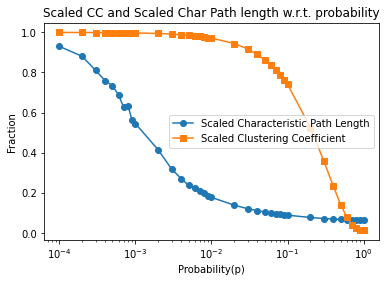

In [12]:
# Plots the semi-log graph of Scaled characteristic path length and Scaled clustering coefficient

plt.semilogx(prob_list, final_char_path_length_list, marker='o', label='Scaled Characteristic Path Length') # Semi Log plot of characteristic path length
plt.semilogx(prob_list, final_clust_coeff_list, marker = 's', label='Scaled Clustering Coefficient')        # Semi log plot of clustering coefficient
plt.title("Scaled CC and Scaled Char Path length w.r.t. probability")
plt.xlabel("Probability(p)")                        # X-axis is labelled as probability
plt.ylabel("Fraction")                              # Y-axis is labelled as the Fraction
plt.legend()                                        # Shows the legend of the plot
plt.show()                                          # Shows the plot

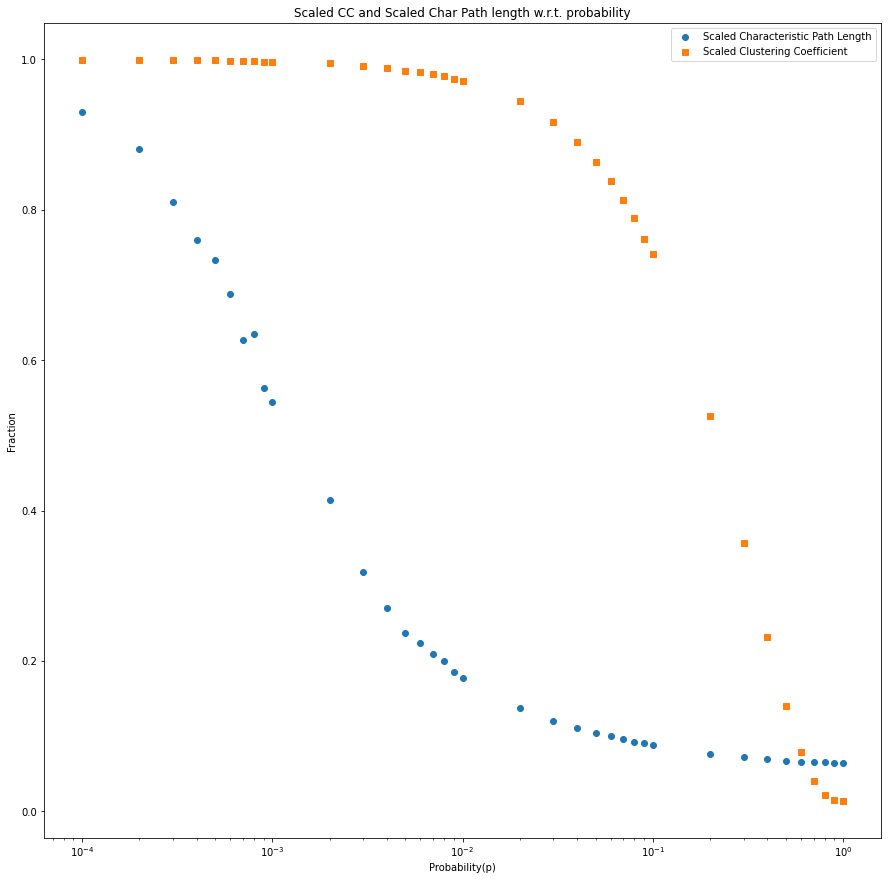

In [13]:
# Plots the semi-log graph of Scaled characteristic path length and Scaled clustering coefficient
# in a better manner with an enlarged figure size and without the line connecting the dots

fig = plt.figure(figsize = (15,15))                 # Sets the fig size of the plot
plt.rc('axes.formatter', useoffset=False)           

plt.scatter(prob_list, final_char_path_length_list, marker='o', label='Scaled Characteristic Path Length')  # Plots the scatter plot for Scaled Characteristic Path length
plt.scatter(prob_list, final_clust_coeff_list, marker = 's', label='Scaled Clustering Coefficient')         # Plots the scatter plot for Scaled Clustering Coefficient

ax=plt.gca()
ax.set_xscale('log')                                # Sets the scale of the X-axis as the log scale
plt.title("Scaled CC and Scaled Char Path length w.r.t. probability")
plt.xlabel("Probability(p)")                        # X-axis is labelled as probability
plt.ylabel("Fraction")                              # Y-axis is labelled as the Fraction
plt.legend()
plt.show()                                          # Shows the plot